In [1]:
from time_series.ARIMA.TimeSeriesSimulatorARIMA import TimeSeriesSimulatorARIMA

In [2]:
ts_simulator = TimeSeriesSimulatorARIMA()
ts_simulator.load_parameters(filename="parameters_set_1_arima.json",
                                 path="/home/louis/Documents/codes/ARIMA_Box_Jenkins_method/")

In [3]:
ts_simulator.generate_time_series()

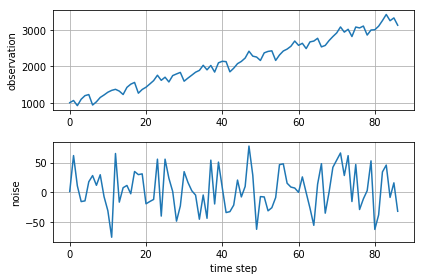

In [4]:
ts_simulator.components.show()

In [5]:
time_serie = ts_simulator.components.observation_values

# 1 - Data preparation: Are the observation stationary ?

The first thing is to see of the data are stationary. We clearly have a upward trend here so the data are not stationary. We are thus going to make the data stationary. 

In [7]:
from analysis.statistics import show_adfuller_analysis

/home/louis/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
show_adfuller_analysis(time_serie)

ADF Statistic: 1.528801
p-value: 0.997627
Critical Values:
	1%: -3.521
	5%: -2.901
	10%: -2.588


In [9]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from analysis.tools import lag_difference

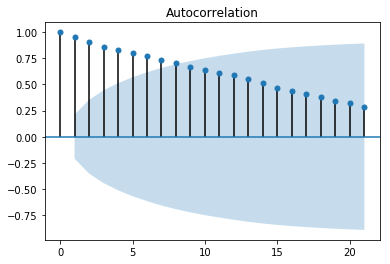

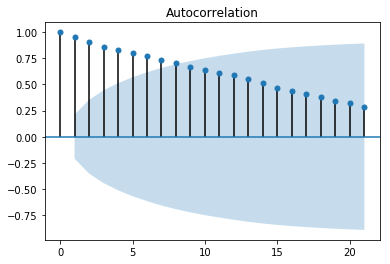

In [10]:
plot_acf(time_serie, lags=21, alpha=0.05)

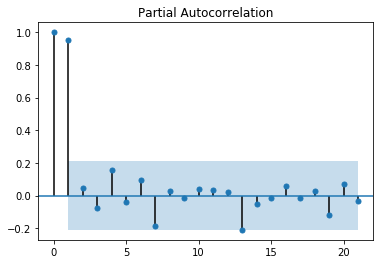

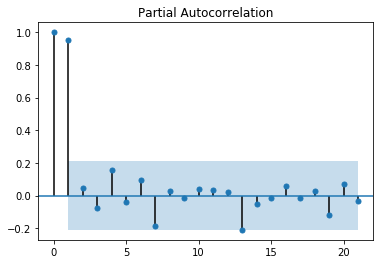

In [27]:
plot_pacf(time_serie, lags=21, alpha=0.05)

In [14]:
pacf(time_serie, nlags=21, alpha=0.05)

(array([ 1.        ,  0.96274129,  0.06012042, -0.10084907,  0.20829503,
        -0.04306661,  0.12813194, -0.25463385,  0.0424805 , -0.00740117,
         0.0451127 ,  0.06004587,  0.01719441, -0.31531273, -0.07571363,
        -0.01244424,  0.09729781, -0.03170825,  0.02457708, -0.19928167,
         0.15062932, -0.06605863]), array([[ 1.        ,  1.        ],
        [ 0.7526111 ,  1.17287149],
        [-0.15000977,  0.27025062],
        [-0.31097927,  0.10928113],
        [-0.00183517,  0.41842522],
        [-0.25319681,  0.16706359],
        [-0.08199825,  0.33826214],
        [-0.46476404, -0.04450365],
        [-0.1676497 ,  0.2526107 ],
        [-0.21753137,  0.20272902],
        [-0.16501749,  0.2552429 ],
        [-0.15008432,  0.27017607],
        [-0.19293578,  0.22732461],
        [-0.52544293, -0.10518254],
        [-0.28584382,  0.13441657],
        [-0.22257443,  0.19768596],
        [-0.11283238,  0.30742801],
        [-0.24183844,  0.17842195],
        [-0.18555312,  0.

In [20]:
difference_seasonal =lag_difference(time_serie, lag=12)

In [21]:
import matplotlib.pyplot as plt

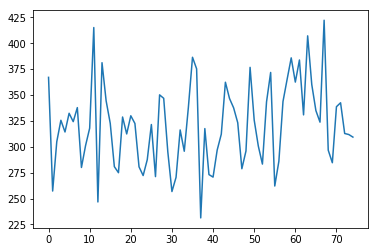

In [22]:
plt.plot(difference_seasonal)

In [ ]:
show_adfuller_analysis(difference_seasonal)

In [23]:
difference = lag_difference(difference_seasonal, lag=1)

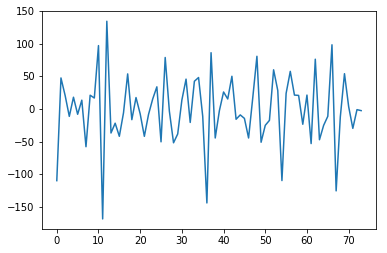

In [24]:
plt.plot(difference)

In [ ]:
plt.hist(difference)

In [ ]:
show_adfuller_analysis(difference)

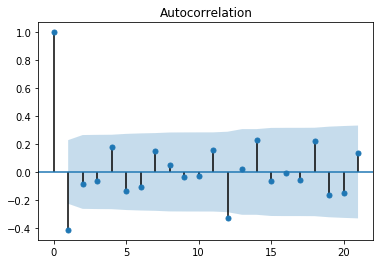

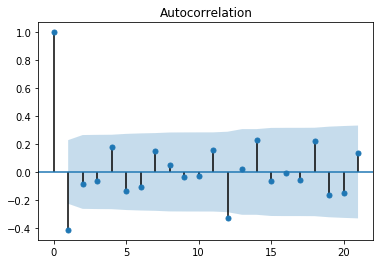

In [25]:
plot_acf(difference, lags=21, alpha=0.05)

# 2 - Model selection: Do we have correlations in the observations ?

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
acorr_ljungbox(difference, lags=20)

# 3 - Estimation of model parameters

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
model = SARIMAX(time_serie, order=(0,1,1), seasonal_order=(0,1,1,12))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   87
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -372.150
Date:                            Thu, 10 Jan 2019   AIC                            750.301
Time:                                    10:31:59   BIC                            757.699
Sample:                                         0   HQIC                           753.280
                                             - 87                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8712      0.060    -14.444      0.000      -0.989      -0.753
ma.S.L12      -0.5445      0.148   

# 4 - Forecasting 

/home/louis/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/louis/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/louis/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=2249.486827, expected=2158.850026
predicted=2304.193650, expected=2367.641518
predicted=2383.617908, expected=2407.426999
predicted=2495.706099, expected=2423.746356
predicted=2366.180666, expected=2159.788461
predicted=2306.370907, expected=2309.044392
predicted=2368.644207, expected=2418.460592
predicted=2546.843558, expected=2470.430676
predicted=2403.895379, expected=2548.670867
predicted=2565.791071, expected=2691.802716
predicted=2553.812732, expected=2573.609495
predicted=2514.627818, expected=2629.750647
predicted=2622.637510, expected=2484.621811
predicted=2617.623818, expected=2668.359382
predicted=2678.374801, expected=2690.686653
predicted=2807.795848, expected=2767.117919
predicted=2689.474077, expected=2531.587693
predicted=2678.645655, expected=2571.108328
predicted=2625.651402, expected=2704.436792
predicted=2852.836028, expected=2814.130493
predicted=2767.320288, expected=2913.717074
predicted=2885.918759, expected=3077.687228
predicted=2932.922601, expected=

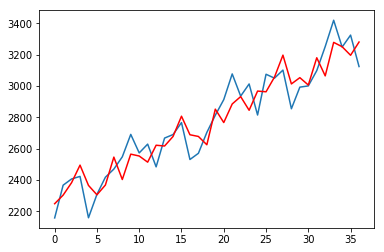

In [37]:
from sklearn.metrics import mean_squared_error

size = 50
X = time_serie
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# 5 - Model  analysis

In [ ]:
from statsmodels.tools.eval_measures import aic